---
---

<center><h1> Assignment</h1></center>

---
---

#### `Instructions`

* ***You are free to use internet to refer the documentation of any library.***
* ***If required, feel free to import other libraries to do the task required.***
* ***Before making a submission, make sure that your code is commented.***

---


#### `Importing the Required Libraries`

---

In [2]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
%matplotlib inline

import os
import glob
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

---

### `SECTION 1:`

---


***1. From the directory, read `ads.csv` file. Observe the dataframe once read and if it doesn't look fine make appropriate changes to the parameters to read the file.***

---

In [ ]:
# read the Ads.csv data in the dataset folder
# write your code here
data_ads = pd.read_csv("ads.csv", skiprows=3)
data_ads.head()


,Time,Ads
0,2017-09-13T00:00:00,80115
1,2017-09-13T01:00:00,79885
2,2017-09-13T02:00:00,89325
3,2017-09-13T03:00:00,101930
4,2017-09-13T04:00:00,121630


---

***2. Convert the time-based column present in the data to date time format and print the head of the data.***

---

In [ ]:
# convert to datetime
# write your code here
data_ads['Time'] = pd.to_datetime(data_ads['Time'], format="%Y-%m-%d %H:%M:%S")


In [ ]:
# view the top rows of the data
# write your code here
data_ads.head()


,Time,Ads
0,2017-09-13 00:00:00,80115
1,2017-09-13 01:00:00,79885
2,2017-09-13 02:00:00,89325
3,2017-09-13 03:00:00,101930
4,2017-09-13 04:00:00,121630


---

***3. Use any library to draw a line plot of the Time Series. On `x-axis` show `time` and on `y-axis` show number of `Ads view.`***

---

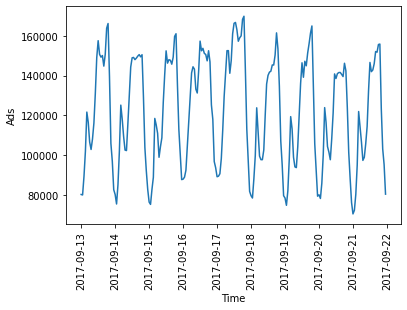

In [ ]:
# write your code here
sns.lineplot(x="Time", y="Ads",data=data_ads)
plt.xticks(rotation=90);

---

***4. The data given currently is hourly basis. Aggregate the data on the `day wise` in a new data frame and plot the time series.***

---

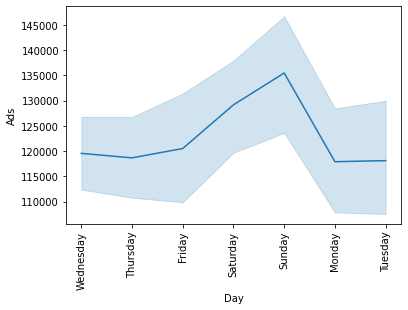

In [ ]:
# write your code here
data_ads['Day'] = data_ads.Time.apply(lambda x: x.day_name())
sns.lineplot(x="Day", y="Ads",data=data_ads)
plt.xticks(rotation=90);


---

***5. Use the `Time` feature to create 3 new features. `Month`, `Week`, and `is_week_end`. In the feature `is_week_end`, mark it as 1 if the day is `Saturday or Sunday` otherwise mark it as 0.***

---

In [ ]:
# write your code here
data_ads['Month'] = data_ads['Time'].dt.month
data_ads['Week'] = data_ads['Time'].dt.week
data_ads["is_week_end"] = data_ads["Day"].apply(lambda x: 1 if x == "Saturday" or x== "Sunday" else 0 )


data_ads[data_ads["Day"] =="Sunday"].head()


,Time,Ads,Day,Month,Week,is_week_end
96,2017-09-17 00:00:00,89060,Sunday,9,37,1
97,2017-09-17 01:00:00,89345,Sunday,9,37,1
98,2017-09-17 02:00:00,90575,Sunday,9,37,1
99,2017-09-17 03:00:00,98290,Sunday,9,37,1
100,2017-09-17 04:00:00,112570,Sunday,9,37,1


---

***6. Now, Again plot the time-series that you have plotted in the question 3. Now, Add 2 vertical lines (for Saturday and Sunday)on `weekend dates` in the plot like the following image.***

---

![](images/weekend.png)

---

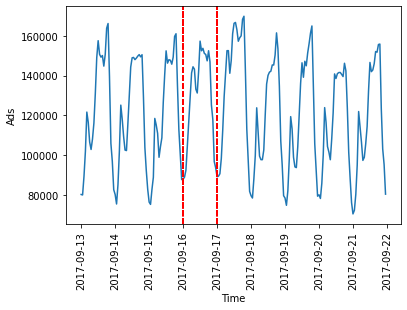

In [ ]:
sns.lineplot(x="Time", y="Ads", data=data_ads)
plt.xticks(rotation=90);

for t in data_ads['Time']:
    if ((t.dayofweek==5) | (t.dayofweek==6)):
      plt.axvline(x=t.date(),color='red', linestyle='--')


---

### `SECTION 2:`

---

***Consider the following student dataframe and answer the questions. It is consist of `roll_no`, `name`, `grade`, and `city`.***

---

In [ ]:
# create student dataframe
student_df = pd.DataFrame.from_dict({
    'roll_no' : [11, 2, 33, 14, 51, 16],
    'name'    : ['AX', 'BO', 'EC', 'ED', 'ET', 'FY'],
    'grade'   : ['A+', 'B', 'B+', 'A', 'B', 'B+'],
    'city'    : ['gurgaon', 'delhi', 'noida', 'delhi', 'delhi', 'gurgaon']
})
student_df

,roll_no,name,grade,city
0,11,AX,A+,gurgaon
1,2,BO,B,delhi
2,33,EC,B+,noida
3,14,ED,A,delhi
4,51,ET,B,delhi
5,16,FY,B+,gurgaon


---

***7. Sort the dataframe by first city(descending order `{Z-A}`) and then by name.(ascending order `{A-Z}`)***

---

In [ ]:
# write your code here
student_df.sort_values(by=['city', 'name'], ascending=[False, True])

,roll_no,name,grade,city
2,33,EC,B+,noida
0,11,AX,A+,gurgaon
5,16,FY,B+,gurgaon
1,2,BO,B,delhi
3,14,ED,A,delhi
4,51,ET,B,delhi


---

***8. Filter the rows where the city name is `gurgaon`***

---

In [ ]:
# write your code here
student_df.loc[student_df['city'] == "gurgaon"]

,roll_no,name,grade,city
0,11,AX,A+,gurgaon
5,16,FY,B+,gurgaon


---

***9. Use the loc function and replace the city name `gurgaon` with `gurugram`.***

---

In [ ]:
# write your code here
student_df.loc[student_df.city.isin(["gurgaon"])].replace("gurgaon","gurugram")


,roll_no,name,grade,city


In [ ]:
student_df

,roll_no,name,grade,city
0,11,AX,A+,gurugram
1,2,BO,B,delhi
2,33,EC,B+,noida
3,14,ED,A,delhi
4,51,ET,B,delhi
5,16,FY,B+,gurugram


---

***Now, we have created another dataframe `favorite_subject_df` which has student `roll_no` and `favorite_subject`***

---

In [ ]:
# create the dataframe
favorite_subject_df = pd.DataFrame.from_dict({
    'Roll_no' : [ 2, 14, 15, 5, 11, 33, 51, 55, 16],
    'favorite_subject' : ['Maths', 'Science', 'Science', 'Physics', 'Maths', 
                          'Computer', 'English', 'Maths', 'Biology']
})
favorite_subject_df

,Roll_no,favorite_subject
0,2,Maths
1,14,Science
2,15,Science
3,5,Physics
4,11,Maths
5,33,Computer
6,51,English
7,55,Maths
8,16,Biology


---

***10. Use to appropriate join to add the favorite subject to the student dataframe.***

---

In [ ]:
# write your code here
favorite_subject_df.columns = ['roll_no','favorite_subject']
student_df.merge(favorite_subject_df, on='roll_no', how='inner')


,roll_no,name,grade,city,favorite_subject
0,11,AX,A+,gurugram,Maths
1,2,BO,B,delhi,Maths
2,33,EC,B+,noida,Computer
3,14,ED,A,delhi,Science
4,51,ET,B,delhi,English
5,16,FY,B+,gurugram,Biology


---
### `SECTION 3:`

---

***Now, we will read the titanic dataset.***

---

In [ ]:
# read the dataset
titanic_data = pd.read_csv('titanic.csv')

In [ ]:
# view the top rows of the data
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Mrs. John Bradley (Florence Briggs Thayer),female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7925.0000,NaN,S
3,4,1,1,Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S


---

***11. Find the total number of passengers `Survived and Not Survived` for each category in `Sex` using a groupby or pivot table.***

---

In [ ]:
# write your code here
titanic_data.groupby(by=['Survived', 'Sex']).agg(['count'])["PassengerId"]

count
Survived Sex          
0        female     81
         male      468
1        female    233
         male      109

***12. In the `Name` column there is a pattern in the title of the person like `Mr, Mrs, Miss`. Use this pattern and create new feature as the `title` using the lambda expressions.***

---

In [ ]:
# write your code here
titanic_data["Title"] = titanic_data["Name"].apply(lambda x :x.split(".")[0])
titanic_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,Mrs. John Bradley (Florence Briggs Thayer),female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7925.0000,NaN,S,Miss
3,4,1,1,Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S,Mr


---

***13. Find out the total number of passengers with each title(feature created in last step).***

----

In [ ]:
# write your code here
titanic_data["Title"].value_counts()


 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Mlle              2
 Major             2
 Col               2
 Don               1
 the Countess      1
 Ms                1
 Mme               1
 Jonkheer          1
 Capt              1
 Lady              1
 Sir               1
Name: Title, dtype: int64

---

***14. Create a new column `age_bins`. Divide the age into 4 different categories `0-20`, `20-40`, `40-60`, `60+`***

---

In [ ]:
# write your code here
bins= [0,20,40,60,80]
labels = ['0-20','20-40','40-60','60+']
titanic_data["age_bins"] = pd.cut(titanic_data['Age'], bins=bins, labels=labels, right=False)
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,age_bins
0,1,0,3,Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,20-40
1,2,1,1,Mrs. John Bradley (Florence Briggs Thayer),female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,20-40
2,3,1,3,Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7925.0000,NaN,S,Miss,20-40
3,4,1,1,Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S,Mrs,20-40
4,5,0,3,Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S,Mr,20-40


---

***15. One-Hot Encode the features `age_bins`(created in last step) and `title`. Import the required libraries also.***

---

In [ ]:
pd.get_dummies(titanic_data[['Title','age_bins']])

,Title_ Capt,Title_ Col,Title_ Don,Title_ Dr,Title_ Jonkheer,Title_ Lady,Title_ Major,Title_ Master,Title_ Miss,Title_ Mlle,Title_ Mme,Title_ Mr,Title_ Mrs,Title_ Ms,Title_ Rev,Title_ Sir,Title_ the Countess,age_bins_0-20,age_bins_20-40,age_bins_40-60,age_bins_60+
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
887,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
888,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
889,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


---

### `SECTION 4:`

---

***Now, we will read the demand forecast data which contains week wise units sold of different products and stores.***

---

In [3]:
# read the demand forecast data
demand_forecast_data = pd.read_csv('demand_forecast.csv')

In [4]:
# view the top rows of the data
demand_forecast_data.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52


In [5]:
# convert the week column to date time
demand_forecast_data['week'] = pd.to_datetime(demand_forecast_data.week)

---

***16. Create new feature `average_units_sold`. Take the average of units sold of a particular `store_id` and `sku_id` and create feature as `average_units_sold`***

---

In [6]:
# write your code here
demand_forecast_data["average_units_sold"]=demand_forecast_data.groupby(["store_id","sku_id"])["units_sold"].transform('mean')
demand_forecast_data.head()


,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,average_units_sold
0,1,2011-01-17,8091,216418,99.0375,111.8625,0,0,20,26.376923
1,2,2011-01-17,8091,216419,99.0375,99.0375,0,0,28,28.307692
2,3,2011-01-17,8091,216425,133.9500,133.9500,0,0,19,25.669231
3,4,2011-01-17,8091,216233,133.9500,133.9500,0,0,44,29.107692
4,5,2011-01-17,8091,217390,141.0750,141.0750,0,0,52,29.469231


---

***17. Create a new feature `unique_sju_id`. Find the number of unique sku ids for the store ids and create a feature.***

---

In [7]:
# write your code here
demand_forecast_data["unique_sju_id"]=demand_forecast_data.groupby(["store_id"])["sku_id"].transform('nunique')
demand_forecast_data.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,average_units_sold,unique_sju_id
0,1,2011-01-17,8091,216418,99.0375,111.8625,0,0,20,26.376923,9
1,2,2011-01-17,8091,216419,99.0375,99.0375,0,0,28,28.307692,9
2,3,2011-01-17,8091,216425,133.9500,133.9500,0,0,19,25.669231,9
3,4,2011-01-17,8091,216233,133.9500,133.9500,0,0,44,29.107692,9
4,5,2011-01-17,8091,217390,141.0750,141.0750,0,0,52,29.469231,9


---

***18. We often split the data into train and test part. In time-series data, we generally keep last few weeks data as the test part and rest of the data as the train part. Define a function `get_train_test_split` which takes the parameter `number_of_weeks`. It will return the train and test dataframe based on the number of weeks pased in the parameter.***

----

In [8]:
# write your code here

def get_train_test_split(train_percent):
    
    demand_forecast_data['mask'] = np.random.randn(len(demand_forecast_data))

    train_df = demand_forecast_data[demand_forecast_data['mask'] <= train_percent]
    test_df = demand_forecast_data[demand_forecast_data['mask'] > (1-train_percent)]

    return train_df, test_df

In [9]:
train, test = get_train_test_split(0.6)
print(len(demand_forecast_data), len(train), len(test))

150150 109010 51706


---

***19. Create a directory name `store_wise_data`. Now, split the data `demand_forecast_data` store-wise and store in the separate `csv` file for each store id present in the data. for example: data with store_id 8091 will be saved in `8091.csv` in the `store_wise_data` folder.***

---

In [10]:
#store_wise_data
!mkdir store_wise_data
for (store_id), group in demand_forecast_data.groupby(['store_id']):
    group.to_csv(f'store_wise_data/{store_id}.csv',index=False)
    



In [23]:
#reading all the files and combining them in a single data frame
import glob
import pandas as pd

# list to store data frames
data_frame_list_store = []

# iterate through each folder
for file in glob.glob('store_wise_data/*'):
  data_frame_list_store.append(pd.read_csv(file))

In [24]:
# concatenate the dataframes
final_data_store = pd.concat(data_frame_list_store)

In [25]:
final_data_store.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,average_units_sold,unique_sju_id,mask
0,1155,2011-01-17,9632,216418,84.0750,84.0750,0,0,33,28.738462,14,0.077516
1,1156,2011-01-17,9632,216419,84.7875,84.7875,0,0,26,24.876923,14,1.144011
2,1157,2011-01-17,9632,300021,84.0750,84.0750,0,0,16,15.969231,14,1.675738
3,1158,2011-01-17,9632,300291,93.3375,105.4500,0,0,14,13.584615,14,0.311741
4,1159,2011-01-17,9632,216425,120.4125,120.4125,0,0,10,15.361538,14,-0.415722


---

***20. You have created a directory `store_wise_data` in the last question. Now, use the glob library and read all the files present in that directory and combine them in a single dataframe. Create a new directory `sku_id_wise_data` and this time you have to split the data `sku_id` wise and store it in a separate `csv` file as you did in the last step in the `sku_id_wise_data` directory.***

---

In [11]:
#sku_id_wise_data
!mkdir sku_id_wise_data
for (sku_id), group in demand_forecast_data.groupby(['sku_id']):
    group.to_csv(f'sku_id_wise_data/{sku_id}.csv',index=False)


In [26]:
#reading all the files and combining them in a single data frame
import glob
import pandas as pd

# list to store data frames
data_frame_list_sku = []

# iterate through each folder
for file in glob.glob('sku_id_wise_data/*'):
  data_frame_list_sku.append(pd.read_csv(file))
    


In [27]:
# concatenate the dataframes
final_data_sku = pd.concat(data_frame_list_sku)

In [28]:
final_data_sku.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,average_units_sold,unique_sju_id,mask
0,66,2011-01-17,8094,679023,178.1250,205.9125,0,0,10,13.369231,24,-0.593264
1,91,2011-01-17,8063,679023,183.1125,183.1125,0,0,8,9.169231,19,-0.983366
2,236,2011-01-17,8317,679023,178.1250,178.1250,0,0,15,24.776923,20,1.145644
3,429,2011-01-17,8869,679023,178.1250,205.9125,0,1,28,28.207692,16,0.948450
4,526,2011-01-17,9092,679023,182.4000,182.4000,0,0,10,16.853846,19,0.601363
